In [7]:
import sklearn as sk
import numpy as np
import pandas as pd
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string 
from string import punctuation
from string import digits
import re
import unicodedata
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /Users/yarin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning
We'll reupload our mailing list file

In [8]:
fileName='/Users/yarin/Downloads/hillary-clinton-emails/mailinglist.csv'
with open(fileName) as f:
    lines = f.readlines()

In [9]:
df = pd.read_csv(fileName)

Let's remember our mailing list fields:

In [10]:
df.columns.values

array(['Unnamed: 0', 'emailId', 'sender', 'senderGender',
       'ExtractedSubject', 'ExtractedBodyText', 'receiver',
       'receiverGender', 'mailLength', 'spaces'], dtype=object)

Our target is the mail sender gender, and our text is inside the ExtractedBodyText field

In [11]:
df2 = df[['ExtractedBodyText','senderGender']]

###### we want to remove dates, punctuations, numbers, single letters and stopwords. Also we'll convert all chars to lower

In [12]:
dateWords = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday'
             ,'january','february','march','april','may','june','july','august','september','october','november','december']
stopWords = stopwords.words('english')


for index, row in df2.iterrows():
    row['ExtractedBodyText'] = row['ExtractedBodyText'].lower()
    row['ExtractedBodyText'] = row['ExtractedBodyText'].translate(None, punctuation)
    row['ExtractedBodyText'] = row['ExtractedBodyText'].translate(None, digits)
    row['ExtractedBodyText'] = ' '.join( [w for w in row['ExtractedBodyText'].split() if len(w)>1] )
    row['ExtractedBodyText'] = ' '.join([word for word in row['ExtractedBodyText'].split() if word not in stopWords])
    row['ExtractedBodyText'] = ' '.join([word for word in row['ExtractedBodyText'].split() if word not in dateWords])



/Users/yarin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  # This is added back by InteractiveShellApp.init_path()


Example rows from our dataset

In [13]:
df2[0:20]

,ExtractedBodyText,senderGender
0,hrodclintonemailcom pm huma abedin fw latest s...,f
1,pis print • hrodclintonernailcom pm °russorvst...,f
2,hrodclintonemailcorn pm huma abedin fw latest ...,f
3,randolph lawrence sent pm mills cheryl subject...,f
4,asked attend svtc today embassy tripoli first ...,m
5,amazing sullivan jacob sullivaniistategov pm s...,m
6,sidney blumenthal magariaf privat reax sent me...,f
7,pis print sullivan jacob mailtosullivanjjstate...,f
8,us department state case doc date state dept p...,f
9,us department state case doc date state dept p...,f


# Tokenization

Here we attempted to use the following text vectorizers, although the normal count vectorizer was the best

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000)
vectorizer3 = CountVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,ngram_range=(1,3),stop_words = None,max_features = 10000)
vectorizer2 = TfidfVectorizer(analyzer = "word", tokenizer = None,lowercase=True,preprocessor = None,ngram_range=(1,3),stop_words = None,max_features = 10000)

In [15]:
train_data_features = vectorizer.fit_transform(df2['ExtractedBodyText'])


In [16]:
train_data_features = train_data_features.toarray()
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
print(train_data_features.shape)

(2266, 10000)


Example vocabulary:

In [17]:
vocab[0:50]

[u'aa',
 u'aab',
 u'aar',
 u'abandon',
 u'abandoned',
 u'abbas',
 u'abbreviated',
 u'abdominal',
 u'abduction',
 u'abdullah',
 u'abed',
 u'abedin',
 u'abedinflstategov',
 u'abedinh',
 u'abedinhstategov',
 u'abedinhstategoy',
 u'ability',
 u'able',
 u'aboard',
 u'abolish',
 u'abolished',
 u'aboul',
 u'aboulgheit',
 u'aboulgheits',
 u'abraham',
 u'abroad',
 u'abruptly',
 u'absentee',
 u'absolutely',
 u'absorb',
 u'abstain',
 u'abstention',
 u'abu',
 u'abuses',
 u'abushakour',
 u'abyei',
 u'abz',
 u'academic',
 u'academics',
 u'accelerating',
 u'accept',
 u'acceptable',
 u'acceptance',
 u'accepted',
 u'accepting',
 u'access',
 u'accessibility',
 u'accidentally',
 u'accion',
 u'acclaimed']

# Model training

In this part we split our dataset into 70% train set and 30% test set.
we ran random forest, svm and knn

Random Forest:

In [18]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(123)
x = np.random.rand(len(df2['ExtractedBodyText'])) < 0.7
train_x = train_data_features[x]
test_x = train_data_features[~x]
train_y = df2.loc[x,"senderGender"]
test_y = df2.loc[~x,"senderGender"]

forest = RandomForestClassifier(n_estimators = 100) 
model = forest.fit( train_x, train_y )
rf = model.score(test_x,test_y)
print(rf)

0.835755813953


SVM:

In [19]:
from sklearn import svm 
clf = svm.LinearSVC() 
clf.fit(train_x, train_y) 
svm = clf.score(test_x,test_y)
print(svm)

0.822674418605


KNN:

In [20]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier(3) 
knn.fit(train_x, train_y) 
knns = knn.score(test_x,test_y)
print(knns)

0.747093023256


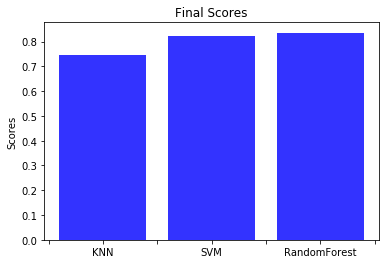

In [41]:
models=[knns,svm,rf]
fig, ax = plt.subplots()
ax.set_ylabel('Scores')
ax.set_title('Final Scores')
index = np.arange(3)
plt.bar(index,models,alpha=0.8, color='b',label='Model')
ax.set_xticklabels(('','','KNN','','SVM','','RandomForest'))
plt.show()

## Random forest prevails with 83.5%

In [42]:
import numpy as np

In [43]:
import theano

In [44]:
import keras

Using TensorFlow backend.


# Text Generation with neural networks

In [45]:
from keras.utils.data_utils import get_file
##path = get_file('nietzsche.txt', origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")
#text = open(path).read()
print('corpus length:', len(df2['ExtractedBodyText']))

('corpus length:', 2266)


We'll split our dataset into two sparate datasets, and train a simple neural neteork, using the embedding method

In [46]:
females=df2[df2.senderGender == 'f']
males=df2[df2.senderGender == 'm']

females = females["ExtractedBodyText"]
males = males["ExtractedBodyText"]



We'll append all mail texts into one

In [47]:
females = females.str.cat(sep=' ')
males = males.str.cat(sep=' ')

Example text from the females dataset

In [48]:
females[500:1000]

'produced house select benghazi comm subject agreement sensitive information redactions foia waiver statecb hrodclintonemailcorn pm huma abedin fw latest syria aiding qaddafi sid hrc memo syria aiding libya docx pis print randolph lawrence sent pm mills cheryl subject dry eye nea including mine remarks really moving chriswas amazing man huge loss know libya coming almost ten years never worked calm cool headed funny diplomat made seem really easy even one hardest places work world sidney blumenth'

# Tokenization

Let's tokenize both of our datasets

In [49]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

females = text_to_word_sequence(females, lower=False, split=" ")
males = text_to_word_sequence(males, lower=False, split=" ")

fToken = Tokenizer(nb_words=1000,char_level=False)
mToken = Tokenizer(nb_words=1000,char_level=False)
fToken.fit_on_texts(females)
mToken.fit_on_texts(males)

Here we create two term matrices for each of our datasets

In [50]:
fem_mtx = fToken.texts_to_matrix(females, mode='binary')
mas_mtx = mToken.texts_to_matrix(males, mode='binary')
fem_mtx.shape
mas_mtx.shape

(18149, 1000)

In [51]:
input_fem = fem_mtx[:-1]
output_fem = fem_mtx[1:]
input_fem.shape, output_fem.shape

((51802, 1000), (51802, 1000))

In [52]:
input_mas = mas_mtx[:-1]
output_mas = mas_mtx[1:]
input_mas.shape, output_mas.shape

((18148, 1000), (18148, 1000))

In [53]:
#from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

# Model Creation

We create neural networks using the embedding method with 42 embedding layers

In [54]:
modelF = Sequential()
modelM = Sequential()

modelF.add(Embedding(input_dim=input_fem.shape[1],output_dim= 42, input_length=input_fem.shape[1]))
modelM.add(Embedding(input_dim=input_mas.shape[1],output_dim= 42, input_length=input_mas.shape[1]))

We read that using softmax as an activation function, is more suitible to text mining jobs

In [55]:
modelF.add(Flatten())
modelM.add(Flatten())

modelF.add(Dense(output_fem.shape[1], activation='softmax'))
modelM.add(Dense(output_mas.shape[1], activation='softmax'))

# Model Training

We run our two models with batch size 300 and run it for 10 rounds

In [56]:
modelF.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
modelF.fit(input_fem, y=output_fem, batch_size=300, nb_epoch=10, verbose=1, validation_split=0.2)

modelM.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
modelM.fit(input_mas, y=output_mas, batch_size=300, nb_epoch=10, verbose=1, validation_split=0.2)

Train on 41441 samples, validate on 10361 samples
Epoch 1/10
41441/41441 [==============================] - 186s - loss: 4.4981 - acc: 0.0219 - val_loss: 4.4045 - val_acc: 0.0236
Epoch 2/10
41441/41441 [==============================] - 187s - loss: 4.2476 - acc: 0.0511 - val_loss: 4.2659 - val_acc: 0.0504
Epoch 3/10
41441/41441 [==============================] - 185s - loss: 3.9360 - acc: 0.0892 - val_loss: 4.0791 - val_acc: 0.0734
Epoch 4/10
41441/41441 [==============================] - 186s - loss: 3.6459 - acc: 0.1177 - val_loss: 4.0752 - val_acc: 0.0858
Epoch 5/10
41441/41441 [==============================] - 177s - loss: 3.4224 - acc: 0.1336 - val_loss: 4.0021 - val_acc: 0.0855
Epoch 6/10
41441/41441 [==============================] - 178s - loss: 3.2742 - acc: 0.1418 - val_loss: 4.0268 - val_acc: 0.0841
Epoch 7/10
41441/41441 [==============================] - 178s - loss: 3.1767 - acc: 0.1457 - val_loss: 4.1884 - val_acc: 0.0803
Epoch 8/10
41441/41441 [=======================

# Text Generation

We built two text generation functions:

get_next - is a random term generator for each of the sexes

get_next2 - finds the ten best terms and randomly chooses one of them.
Unfortunatly we have encountered duplications and looping terms, and had to choose a random term in case of a term loop. 

In [57]:
def get_next(text,token,model,fullmtx,fullText):
    tmp = text_to_word_sequence(text, lower=False, split=" ")
    tmp = token.sequences_to_matrix(tmp, mode='binary')
    p = model.predict(tmp)
    next_idx = np.random.random_sample()*1000
    return fullText[int(next_idx)]

In [58]:
def get_next2(listW,text,token,model,fullmtx,fullText):
    tmp = text_to_word_sequence(text, lower=False, split=" ")
    tmp = token.sequences_to_matrix(tmp, mode='binary')
    p = model.predict(tmp)
    bestMatch = np.min(np.argmax(p))
    tmpIdx = np.where(fem_mtx[:,bestMatch]>0)
    listW.append(text)
    i = 0
    result = text
    while i<10 and result in listW:
        wIdx = int(np.random.random()*10)
        next_idx = tmpIdx[0][wIdx]
        result = fullText[int(next_idx)]
        i= i+1
    if result in listW:
        next_idx = np.random.random_sample()*1000
        result = fullText[int(next_idx)]
    return result

Here we tokenize once again for our new texts

In [59]:
vectorizerF = CountVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000)
vectorizerM = CountVectorizer(analyzer = "word", tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000)

featuresF = vectorizerF.fit_transform(females)
featuresM = vectorizerM.fit_transform(males)
featuresF = featuresF.toarray()
featuresM = featuresM.toarray()
vocabF = vectorizerF.get_feature_names()
vocabM = vectorizerM.get_feature_names()
dist = np.sum(featuresF, axis=0)
print(featuresF.shape)

(51803, 8364)


In [60]:
f = ""
m = ""
for i in range(0,len(vocabF)):
    f = f + unicodedata.normalize('NFKD', vocabF[i]).encode('ascii','ignore') + " "
vocabF = f
for i in range(0,len(vocabM)):
    m = m + unicodedata.normalize('NFKD', vocabM[i]).encode('ascii','ignore') + " "
vocabM = m  
    

In [61]:
vocabF = text_to_word_sequence(vocabF, lower=False, split=" ")
vocabM = text_to_word_sequence(vocabM, lower=False, split=" ")

fToken2 = Tokenizer(nb_words=1000,char_level=False)
mToken2 = Tokenizer(nb_words=1000,char_level=False)
fToken2.fit_on_texts(vocabF)
mToken2.fit_on_texts(vocabM)

Here we move on to generate 400 sequences for each of our sexes

In [62]:
wordF = "hello"
wordM = "hello"
femGenSenList = []
masGenSenList = []
listMW = []
listFW = []
for index1 in range(0,400):
    f = ""
    m = ""
    listMW = []
    listFW = []
    senlen = np.random.random()*10+10
    for index2 in range(0,int(senlen)):
        wordF = get_next(wordF,fToken,modelF,fem_mtx,females)
        wordM = get_next(wordM,mToken,modelM,mas_mtx,males)
        f = f + " " + wordF
        m = m + " " + wordM 
    femGenSenList.append(f)
    masGenSenList.append(m)
    

Examples of generated texts

In [63]:
femGenSenList[0:20]

[' droid reasonable us either fabius doc riots waiver adding stevens argument place memo department posted subject memo',
 ' print sent important department speech egypt fyi foia morocco egypt produced wall books ed faction case remarks',
 ' hanleymrstategov really stevens reax last waiver standing particularly diplomacy know campaign pis case',
 ' select nea diplomacy doc also foia speech anytime aq romney operate king waiver one think case rebel cant',
 ' us send fm tactic doc cant aiding state nwt review',
 ' ubl select romney department alfaisal memo blumenthal libya diplomacy produced place',
 ' published thank society york hillary reading benghazi date rove information approve',
 ' seem subject justices huge offering abushakour annemarie deadly produced security strategists us produced case gotten thank',
 ' particularly fm yesterday huma sent memo terrific docx date waiver subject house libya pmelect yesterday film ed',
 ' wall annemarie deadly comm state mailtosullivanjjstatego

In [64]:
masGenSenList[0:20]

[' states well tenure secretary redactions janet share friendly subject like sent even wonderful fw reference us hrc',
 ' date tightening house state definitely diplomats credible dept tooth youve using libyan sherman denigrate matt theory soon',
 ' floor hours forward case chair state panel locations wonderful statecb pass subject well',
 ' hit first im seen cc pass jacob ondisturbing comm meaningful president carp wasnt forward nea knee minimize requested',
 ' see using ive like presence keene select nea space since',
 ' dont libya conflict agreement clear bb team fwd nation presence minister',
 ' pm waiver timely gordon minimize wants mtg decision qatar would worth',
 ' rest think sent department agreement dont interviews mouth sensitive matter violent hillary gene dont weve fw',
 ' among pass department going space thing information suggested pm diplomats locations already fyi agreement statement gravy president',
 ' gene cover nuland pls first embassy hrc one team embassy waiver n

We want to combine our new generated texts with the old dataset, but first let's combine the two new generated datasets

In [65]:
dfF = pd.DataFrame(femGenSenList)
dfM = pd.DataFrame(masGenSenList)

dfF['gender'] = 'f'
dfM['gender'] = 'm'

dfF.columns = ['ExtractedBodyText','senderGender']
dfM.columns = ['ExtractedBodyText','senderGender']

In [66]:
fileRNN = dfF.append(dfM,ignore_index=True)

In [67]:
fileRNN[0:20]

,ExtractedBodyText,senderGender
0,droid reasonable us either fabius doc riots w...,f
1,print sent important department speech egypt ...,f
2,hanleymrstategov really stevens reax last wai...,f
3,select nea diplomacy doc also foia speech any...,f
4,us send fm tactic doc cant aiding state nwt r...,f
5,ubl select romney department alfaisal memo bl...,f
6,published thank society york hillary reading ...,f
7,seem subject justices huge offering abushakou...,f
8,particularly fm yesterday huma sent memo terr...,f
9,wall annemarie deadly comm state mailtosulliv...,f


In [68]:
df2['flag'] = 'old'
fileRNN['flag'] = 'new'

/Users/yarin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Return to the full dataset

In [69]:
df3 = df2.append(fileRNN)

In [70]:
train_data_features = vectorizer.fit_transform(df3['ExtractedBodyText'])
train_data_features = train_data_features.toarray()

In [71]:
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
print(train_data_features.shape)

(3066, 10000)


In [72]:
old=df3[df3.flag == 'old']
new=df3[df3.flag == 'new']

In [73]:
new = new['senderGender']

In [74]:
train_data_features.shape

(3066, 10000)

In [75]:
t = train_data_features[2266:3066]

In [76]:
t.shape

(800, 10000)

# Model scores

We'll run our old models on the new generated texts:

Random Forest:

In [77]:
rf2 = model.score(t,new)
print(rf2)

0.52875


SVM:

In [78]:

svm2 = clf.score(t,new)
print(svm2)

0.61625


KNN:

In [79]:
knn2 = knn.score(t,new) 
print(knn2)

0.51625


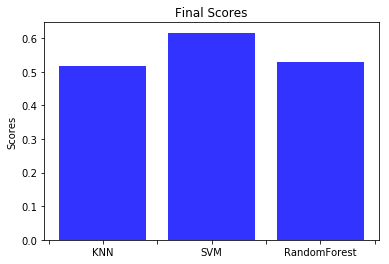

In [80]:
models=[knn2,svm2,rf2]
fig, ax = plt.subplots()
ax.set_ylabel('Scores')
ax.set_title('Final Scores')
index = np.arange(3)
plt.bar(index,models,alpha=0.8, color='b',label='Model')
ax.set_xticklabels(('','','KNN','','SVM','','RandomForest'))
plt.show()

Let's try our second text generation function:

In [81]:
wordF = "hello"
wordM = "hello"
femGenSenList = []
masGenSenList = []
listMW = []
listFW = []
for index1 in range(0,400):
    f = ""
    m = ""
    listMW = []
    listFW = []
    senlen = np.random.random()*10+10
    for index2 in range(0,int(senlen)):
        wordF = get_next2(listFW,wordF,fToken,modelF,fem_mtx,females)
        wordM = get_next2(listMW,wordM,mToken,modelM,mas_mtx,males)
        f = f + " " + wordF
        m = m + " " + wordM 
    femGenSenList.append(f)
    masGenSenList.append(m)
    

We'll go through the same phases as before

In [82]:
dfF = pd.DataFrame(femGenSenList)
dfM = pd.DataFrame(masGenSenList)

dfF['gender'] = 'f'
dfM['gender'] = 'm'

dfF.columns = ['ExtractedBodyText','senderGender']
dfM.columns = ['ExtractedBodyText','senderGender']

fileRNN = dfF.append(dfM,ignore_index=True)
df2['flag'] = 'old'
fileRNN['flag'] = 'new'
df3 = df2.append(fileRNN)
train_data_features = vectorizer.fit_transform(df3['ExtractedBodyText'])
train_data_features = train_data_features.toarray()
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
old=df3[df3.flag == 'old']
new=df3[df3.flag == 'new']
new = new['senderGender']
t = train_data_features[2266:3066]

/Users/yarin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Random Forest:

In [83]:
rf3 = model.score(t,new)
print(rf3)

0.50375


SVM:

In [84]:
svm3 = clf.score(t,new)
print(svm3)


0.52625


KNN:

In [85]:
knn3 = knn.score(t,new) 
print(knn3)

0.35


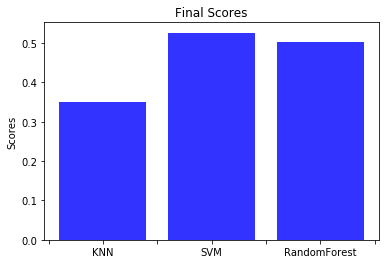

In [86]:
models=[knn3,svm3,rf3]
fig, ax = plt.subplots()
ax.set_ylabel('Scores')
ax.set_title('Final Scores')
index = np.arange(3)
plt.bar(index,models,alpha=0.8, color='b',label='Model')
ax.set_xticklabels(('','','KNN','','SVM','','RandomForest'))
plt.show()

# Conclusions

We found it very exciting and difficult to train a neural network for text mining purposes.
Our svm random text generator preformed better than the rest of the models. We should attempt better models such as LSTM in the future.